In [1]:
# Imports
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report

In [2]:
# Import metadata for movies
data = pd.read_csv('/content/movies_metadata.csv')

In [3]:
# Review the DataFrame
data.head(3)

,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033,81.0,Released,NaN,Toy Story,7.7,5415
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92


In [4]:
df = data[['id', 'budget', 'revenue', 'vote_average', 'vote_count']]

In [5]:
df.head()

,id,budget,revenue,vote_average,vote_count
0,862,30000000,373554033,7.7,5415
1,8844,65000000,262797249,6.9,2413
2,15602,0,0,6.5,92
3,31357,16000000,81452156,6.1,34
4,11862,0,76578911,5.7,173


In [6]:
# Calculating the minimum number of votes to be in the chart
min_votes = df['vote_count'].quantile(0.90)

# Filtering out all qualified movies into a new DataFrame
new_movies_df = df.copy().loc[df['vote_count'] >= min_votes]

In [7]:
new_movies_df.head()

,id,budget,revenue,vote_average,vote_count
0,862,30000000,373554033,7.7,5415
1,8844,65000000,262797249,6.9,2413
5,949,60000000,187436818,7.7,1886
9,710,58000000,352194034,6.6,1194
12,21032,0,11348324,7.1,423


In [8]:
# Calculating the average vote rate
vote_rate = data['vote_average'].mean()

# Computing the score(rating) of each movie
def score(x, min_votes = min_votes, vote_rate = vote_rate):
    vote_cnt = x['vote_count']
    vote_avg = x['vote_average']
    # Calculation based on the IMDB formula
    return round((vote_cnt/(vote_cnt+min_votes) * vote_avg) + (min_votes/(min_votes+vote_cnt) * vote_rate))

In [9]:
# Defining a new feature 'score' and calculate its value
new_movies_df['score'] = new_movies_df.apply(score, axis=1)
# drop columns not required
new_movies_df = new_movies_df.drop(columns = ['vote_count', 'vote_average'])
# review sample top 5 movies
new_movies_df.head()

,id,budget,revenue,score
0,862,30000000,373554033,8
1,8844,65000000,262797249,7
5,949,60000000,187436818,7
9,710,58000000,352194034,6
12,21032,0,11348324,7


In [10]:
new_movies_df['id'] = new_movies_df['id'].astype('int')
new_movies_df['budget'] = new_movies_df['budget'].astype('int')
new_movies_df['revenue'] = new_movies_df['revenue'].astype('int')
new_movies_df['score'] = new_movies_df['score'].astype('int')
new_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3199 entries, 0 to 31817
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       3199 non-null   int64
 1   budget   3199 non-null   int64
 2   revenue  3199 non-null   int64
 3   score    3199 non-null   int64
dtypes: int64(4)
memory usage: 125.0 KB


In [11]:
# Creating the features set X
X = new_movies_df.drop(columns = ['score'])
# Display sample data
X.head()

,id,budget,revenue
0,862,30000000,373554033
1,8844,65000000,262797249
5,949,60000000,187436818
9,710,58000000,352194034
12,21032,0,11348324


In [12]:
# Creating the target set y
y = new_movies_df["score"]

# Display sample data
y.head()

0     8
1     7
5     7
9     6
12    7
Name: score, dtype: int64

In [13]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [14]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
# Import a new classifier from SKLearn
from sklearn.ensemble import AdaBoostClassifier

# Initiate the model instance
model = AdaBoostClassifier()
 
# Fit the model to the data using the training data
model = model.fit(X_train_scaled, y_train)
 


In [16]:
# Use the testing data to make the model predictions
pred = model.predict(X_test_scaled)

In [17]:
# Use a classification report to evaluate the model using the predictions and testing data
testing_report = classification_report(y_test, pred)

In [18]:
# Print the classification report
print(f'\n Classification Report by increasing the long window for the SMA input features \n{testing_report}')


 Classification Report by increasing the long window for the SMA input features 
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         2
           5       0.10      0.01      0.02        98
           6       0.63      0.82      0.71       445
           7       0.56      0.33      0.42       230
           8       0.13      0.28      0.17        25

    accuracy                           0.56       800
   macro avg       0.28      0.29      0.26       800
weighted avg       0.53      0.56      0.52       800



<Axes: >

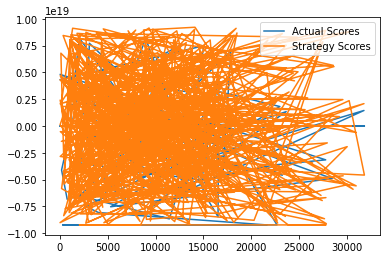

In [19]:
# Create a predictions DataFrame
boost_predictions_df = pd.DataFrame(index=X_test.index)

# Add the SVM model predictions to the DataFrame
boost_predictions_df['Predicted'] = pred

# Add the actual scores to the DataFrame
boost_predictions_df['Actual Scores'] = new_movies_df["score"]

# Add the strategy scores to the DataFrame
boost_predictions_df['Strategy Scores'] = boost_predictions_df['Actual Scores'] * boost_predictions_df['Predicted']

# Review the DataFrame
boost_predictions_df.head()

# Plot the actual scores versus the strategy scores
(1 + boost_predictions_df[["Actual Scores", "Strategy Scores"]]).cumprod().plot()